# Test De personnalité

### Bibliothèques

In [195]:
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt

#Librairies de preprocessing Scikit-Learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

#Librairies de modèle
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


### Création du dataset

#### 1. Récupérer tous les chemins et l'assigner à une variable

In [163]:
mon_dossier = './DataSet'
fichier = [file for file in listdir(mon_dossier)if isfile(join(mon_dossier, file))]
fichier

['DataSet__ Vð__.csv',
 'DataSet__ ċƆ__.csv',
 'DataSet__2__ .csv',
 'DataSet__3ƼĴ__.csv',
 'DataSet__aË®__.csv',
 'DataSet__EǡǍ__.csv',
 'DataSet__hihi__.csv',
 'DataSet__iŔC__.csv',
 'DataSet__PL__.csv',
 'DataSet__TƎƪ__.csv',
 'DataSet__¯]Ǌ__k.csv',
 'DataSet__¹×Ã__.csv',
 'DataSet__ÌĤĨ__.csv',
 'DataSet__ñ5Ĉ__.csv',
 'DataSet__Ôūs__.csv',
 'DataSet__Ģ __.csv',
 'DataSet__īßŏ__.csv',
 'DataSet__Ŀĸ0__.csv',
 'DataSet__žǠī__.csv',
 'DataSet__ƒ=Ŭ__.csv',
 'DataSet__ƙì&__.csv',
 'DataSet__ư __.csv',
 'DataSet__Ǥ j__.csv']

#### 2. Création du dataframe

In [164]:
df = []
for i in fichier :
    df.append(pd.read_csv(mon_dossier + "/" + i))
#'./DataSet/DataSet__¯]Ǌ__k.csv'

In [165]:
df_total = pd.concat(df, ignore_index=True)

#### 3. Exploration du dataframe

In [166]:
df_total.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Score,Interpretation
0,a,b,c,b,a,1,3.0,2.0,1.0,3.0,10,B
1,a,b,c,a,b,1,3.0,2.0,3.0,1.0,10,B
2,a,b,c,a,b,1,2.0,3.0,1.0,2.0,8,C
3,a,c,a,a,a,2,3.0,2.0,2.0,3.0,10,B
4,a,c,c,b,a,1,NaN,NaN,NaN,3.0,9,C


In [167]:
df_total.shape

(235, 12)

In [168]:
df_total.dtypes

Q1                object
Q2                object
Q3                object
Q4                object
Q5                object
Q6                object
Q7                object
Q8                object
Q9                object
Q10               object
Score              int64
Interpretation    object
dtype: object

In [169]:
df_total['Q7'].value_counts()

3                  37
2                  35
1                  33
3.0                24
2.0                20
3.0                16
1.0                10
2.0                 9
1.0                 7
a                   5
&                   2
A                   2
ui                  1
mlp                 1
m                   1
n                   1
C                   1
y                   1
<<<<                1
(3)                 1
6                   1
5                   1
azerty              1
8                   1
e                   1
meme pas peur       1
"                   1
é                   1
0                   1
j'en veux pas       1
hello               1
jesuisunephrase     1
w                   1
6                   1
7                   1
helloworld          1
t                   1
Name: Q7, dtype: int64

### Preprocessing

#### Remplacement des valeurs nulles par le mode

In [170]:
#Somme des valeurs nulles par colonnes
df_total.isna().sum()

Q1                 8
Q2                12
Q3                13
Q4                10
Q5                14
Q6                12
Q7                10
Q8                13
Q9                10
Q10                8
Score              0
Interpretation     0
dtype: int64

In [171]:
#Remplacement des valeurs nulles par le mode
df_total = df_total.fillna(df_total.mode().iloc[0])
df_total.head()

C:\Users\utilisateur\anaconda\lib\site-packages\pandas\core\algorithms.py:968: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'float'
  warn(f"Unable to sort modes: {err}")


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Score,Interpretation
0,a,b,c,b,a,1,3.0,2.0,1.0,3.0,10,B
1,a,b,c,a,b,1,3.0,2.0,3.0,1.0,10,B
2,a,b,c,a,b,1,2.0,3.0,1.0,2.0,8,C
3,a,c,a,a,a,2,3.0,2.0,2.0,3.0,10,B
4,a,c,c,b,a,1,3,3.0,1.0,3.0,9,C


#### Vérification des valeurs nulles

In [172]:
df_total.isna().sum()

Q1                0
Q2                0
Q3                0
Q4                0
Q5                0
Q6                0
Q7                0
Q8                0
Q9                0
Q10               0
Score             0
Interpretation    0
dtype: int64

#### Remplacement des valeurs erronées par le mode

In [173]:
#Changement des valeurs avec la méthode replace
#val = df_total['Q1'].mode()[0]
#df_total['Q1'].replace(regex='[[^a-c]{1}]', value=val).value_counts()

In [174]:
print(f"Le mode des questions 1 à 4 est : {df_total.iloc[:, :4].mode().iloc[0]}")

Le mode des questions 1 à 4 est : Q1    a
Q2    b
Q3    c
Q4    a
Name: 0, dtype: object


In [175]:
#Création d'un dataframe des variables 
qualitatives = df_total.iloc[:, :4].columns
qualitatives

Index(['Q1', 'Q2', 'Q3', 'Q4'], dtype='object')

In [176]:
#Remplacement des valeurs erronées des colonnes Q1 à Q4 avec la méthode where() 

values = ['a', 'b', 'c']
for i in qualitatives:
    df_total[i] = df_total[i].where(df_total[i].isin(values), df_total[i].mode()[0])
   

In [177]:
#Remplacement des valeurs erronées de la colonne Q5 avec la méthode where() 
mode_q5 = df_total['Q5'].mode()[0]
df_total['Q5'] = df_total['Q5'].where(df_total['Q5'].isin(values[:2]), mode_q5)

In [178]:
quantitatives = df_total.iloc[:, 5:10].columns
quantitatives

Index(['Q6', 'Q7', 'Q8', 'Q9', 'Q10'], dtype='object')

In [179]:
#Remplacement des valeurs erronées des colonnes Q6 à Q10 avec la méthode where() 
num_values = [1, 2, 3]
for i in quantitatives:
    df_total[i] = df_total[i].where(df_total[i].isin(num_values), df_total[i].mode()[0])

In [180]:
df_total.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Score,Interpretation
0,a,b,c,b,a,1,3.0,2.0,1.0,3.0,10,B
1,a,b,c,a,b,1,3.0,2.0,3.0,1.0,10,B
2,a,b,c,a,b,1,2.0,3.0,1.0,2.0,8,C
3,a,c,a,a,a,2,3.0,2.0,2.0,3.0,10,B
4,a,c,c,b,a,1,3,3.0,1.0,3.0,9,C


#### Encodage des variables avec ordinary encoder

In [181]:
df_total.iloc[:,5:10].info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q6      235 non-null    object
 1   Q7      235 non-null    object
 2   Q8      235 non-null    object
 3   Q9      235 non-null    object
 4   Q10     235 non-null    object
dtypes: object(5)
memory usage: 9.3+ KB


##### Conversion des données en int

In [182]:
df_total.iloc[:, 5:10] = df_total.iloc[:, 5:10].astype(int)

In [183]:
enc = OrdinalEncoder()
df_total.iloc[:,:5] = enc.fit_transform(df_total.iloc[:,:5])

In [184]:
df_total.iloc[:,5:10] = enc.fit_transform(df_total.iloc[:,5:10])

##### Vérification des valeurs

In [185]:
df_total['Q3'].value_counts()

2.0    138
0.0     53
1.0     44
Name: Q3, dtype: int64

In [186]:
df_total['Q7'].value_counts()

2.0    208
1.0     20
0.0      7
Name: Q7, dtype: int64

In [187]:
df_total.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Score,Interpretation
0,0.0,1.0,2.0,1.0,0.0,0.0,2.0,1.0,0.0,2.0,10,B
1,0.0,1.0,2.0,0.0,1.0,0.0,2.0,1.0,2.0,0.0,10,B
2,0.0,1.0,2.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,8,C
3,0.0,2.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,2.0,10,B
4,0.0,2.0,2.0,1.0,0.0,0.0,2.0,2.0,0.0,2.0,9,C


#### Fractionnement du jeu de données

In [188]:
#Features
X = df_total.iloc[:, :10]

#Target
y = df_total['Interpretation']

#Fractionnement
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

Vérification de la dimension des données

In [189]:
X_train.shape

(188, 10)

In [190]:
y_train.shape

(188,)

In [191]:
y_test.shape

(47,)

### KNN from scratch

#### Fonction distance

In [ ]:
def distance(Data_1, Data_2, metric='euclidean', **kargs):
    
    if kargs.items():
        
        for key,value in kargs.items():
            if key == 'p' :
                p = value
    else :
        p = 3
    
    if metric == 'euclidean' :
        Dis = np.sqrt(np.sum((Data_1-Data_2)**2))
    elif metric == 'manhattan' :
        Dis = np.abs(np.sum(Data_1-Data_2))
    elif metric == 'minkowski':
            Dis = (np.sum(np.abs(Data_1-Data_2))**p)**(1/p)
    return Dis

In [233]:
def dist(a:list, b:list, metrics, p=3):
    '''
    Calcule la distance Euclidienne, Manhattan ou (Minkowski à faire) entre les vecteurs a et b
    '''
    if metrics == "Euclidean":
        d_euc = 0
        for i,j in zip(a,b):
            d_euc = d_euc + ((i - j)**2)
        d = d_euc**0.5
    
    elif metrics == "Manhattan":
        d_man = 0
        for i,j in zip(a,b):
            d_man = d_man + abs(i-j)
        d = d_man
    
    elif metrics == 'Minkowski':
        d_mink = 0
        for i,j in zip(a,b):
            d_mink = d_mink + ((abs(i-j))**p)**(1/p)
        d = d_mink
    
    return d

#### Fonction KNN

In [158]:
#Correction
resultat = []


k = 3
for j in range(0, len(X_test)):
    D_T = X_test.iloc[j, :]
    Distance = []
    for i in range(0, len(X_train)):
        D_A = X_train.iloc[i, :]
        dis = np.sqrt(np.sum(D_T-D_A)**2)
        Distance.append(dis)

    s = np.argsort(Distance) #==> Returns the indices that would sort an array.

    index_proche = S[:k]
    pred = y_train.iloc[index_proche]
    pred = (np.sum(pred == 'A').astype(int)), (np.sum(pred == 'B').astype(int), (np.sum(pred == 'C')))
    pred = np.argmax(pred) #==> retourne un indice max

    if pred == 0:
        p = 'A'
    elif pred == 1:
        p = 'B'
    else:
        p = 'C'
    
    resultat.append(p)


NameError: name 'S' is not defined

In [234]:
def knn(data_test, data_train, label_train, metric, k = 5):
    ''' Prédit la classe d'un nouveau point du dataset test '''
    
    prediction = []
    percent = []
    for index, row in data_test.iterrows():
        data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
        id_small = data_train['distance'].nsmallest(k).index
        total = len(id_small)
        c = pd.concat([data_train, label_train], axis = 1)
        target_A = ((c.loc[id_small]['Interpretation'] == 'A').sum()/total*100, 'A')
        target_B = ((c.loc[id_small]['Interpretation'] == 'B').sum()/total*100, 'B')
        target_C = ((c.loc[id_small]['Interpretation'] == 'C').sum()/total*100, 'C')
        
        target_sorted = sorted([target_A, target_B, target_C])
        prediction.append(target_sorted[-1][1])
        percent.append(target_sorted[-1][0])
        
        #data_test['prediction_classe'] = target_sorted[-1][1]
        #data_test['percent'] = target_sorted[-1][0]
    
    return prediction, percent

##### KNN sur différents paramètres

#### Accuracy

In [235]:
y_true = list(y_test)
len(y_true)

47

In [236]:
def accuracy(y_predit, y_true):
    prediction_ok = 0
    for i, j in zip(y_predit, y_true):
        if i == j:
            prediction_ok += 1

    accuracy = prediction_ok/len(y_true)*100
    return accuracy

In [237]:
acc_euclidien = []
for k in range(1, 10+1):
    y_pred = knn(X_test, X_train, y_train, "Euclidean", k=k)[0]
    acc_euclidien.append(accuracy(y_pred, y_true))
acc_euclidien

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

[65.95744680851064,
 72.3404255319149,
 72.3404255319149,
 72.3404255319149,
 76.59574468085107,
 72.3404255319149,
 72.3404255319149,
 70.2127659574468,
 72.3404255319149,
 74.46808510638297]

In [238]:
acc_manhattan = []
for k in range(1, 10+1):
    y_pred = knn(X_test, X_train, y_train, "Manhattan", k=k)[0]
    acc_manhattan.append(accuracy(y_pred, y_true))


<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [239]:
acc_minkowski = []
for k in range(1, 10+1):
    y_pred = knn(X_test, X_train, y_train, "Minkowski", k=k)[0]
    acc_minkowski.append(accuracy(y_pred, y_true))


<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['distance'] = data_train.apply(lambda ligne: dist(row, ligne, metric), axis = 1)
<ipython-input-234-04b4808e652c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [241]:
sorted(acc_euclidien)

[65.95744680851064,
 70.2127659574468,
 72.3404255319149,
 72.3404255319149,
 72.3404255319149,
 72.3404255319149,
 72.3404255319149,
 72.3404255319149,
 74.46808510638297,
 76.59574468085107]

<function matplotlib.pyplot.show(*args, **kw)>

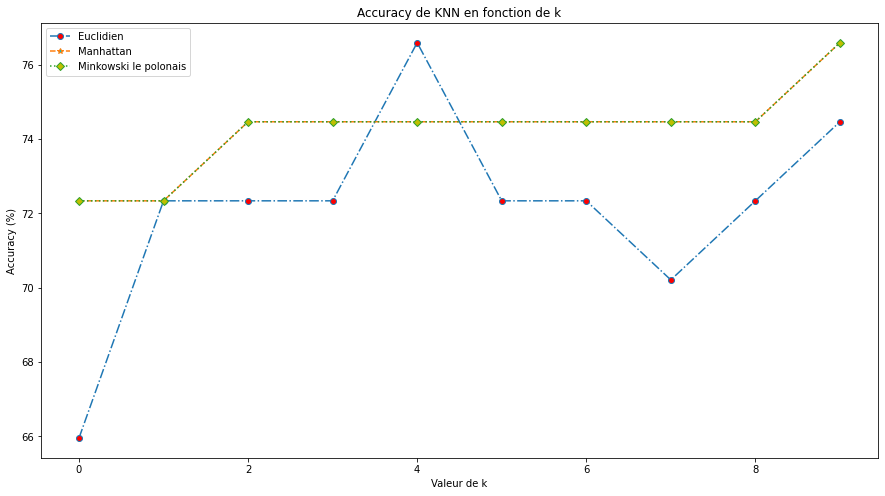

In [240]:
plt.figure(figsize = (15,8))
plt.plot(acc_euclidien, linestyle = '-.', marker = 'o', markerfacecolor = 'r', label = "Euclidien")
plt.plot(acc_manhattan, linestyle = '--', marker = '*', markerfacecolor = 'c', label = "Manhattan")
plt.plot(acc_minkowski, linestyle = ':', marker = 'D', markerfacecolor = 'y', label = "Minkowski le polonais")
plt.title("Accuracy de KNN en fonction de k")
plt.xlabel("Valeur de k")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(False)
plt.show

### Scikit Learn

In [192]:
#Définition du modèle
model_knn = KNeighborsClassifier(n_neighbors=5)

#Entrainement du modèle
model_knn.fit(X_train, y_train)


KNeighborsClassifier()

In [193]:
#Prédictions
y_predicts_skl = model_knn.predict(X_test)

##### Courbe de précision en fonction de k pour la méthode Minkowski

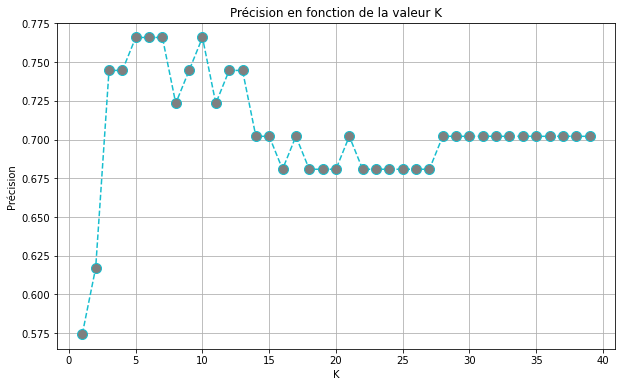

In [199]:
#Méthode par défaut Minkowski
acc = []
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
#On affiche le résultat sous la forme d'un graphique 
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'C9',linestyle='dashed', 
         marker='o',markerfacecolor='C7', markersize=10)
plt.title('Précision en fonction de la valeur K')
plt.xlabel('K')
plt.ylabel('Précision')
plt.grid()

#### Gridsearch

In [95]:
#Définition des paramètres
parameters = {'n_neighbors': np.arange(1, 20), 'metric':["euclidean", "minkowski", "manhattan"]}

#Définition du modèle
model_knn = KNeighborsClassifier()

#Gridsearch
knn = GridSearchCV(model_knn, parameters, cv = 5)


In [96]:
knn.fit(X_train, y_train)
print('Best parameters : ', knn.best_params_)
print('Accuracy_test : ', knn.score(X_test, y_test))

C:\Users\utilisateur\anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Best parameters :  {'metric': 'manhattan', 'n_neighbors': 10}
Accuracy_test :  0.7021276595744681


In [97]:
y_predit_knn = knn.predict(X_test)
#np.sum(y_predit_knn=='A')
y_predit_knn

array(['B', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'B', 'C',
       'C', 'C', 'C', 'C', 'C', 'B', 'C', 'C', 'B', 'B', 'C', 'C', 'B',
       'C', 'C', 'B', 'C', 'C', 'C', 'B', 'C'], dtype=object)

##### Accuracy

In [ ]:
accuracy_skl = accuracy_score(y_test, y_predit_knn)
accuracy_skl

In [98]:
y_test.value_counts()

C    30
B    15
A     2
Name: Interpretation, dtype: int64

##### Matrice de confusion

In [101]:
matrice_confusion = confusion_matrix(y_test, y_predit_knn)
matrice_confusion

array([[ 0,  2,  0],
       [ 0,  5, 10],
       [ 0,  2, 28]], dtype=int64)

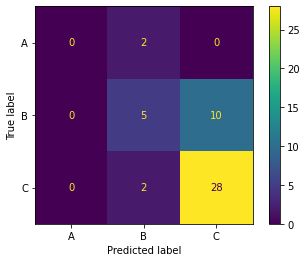

In [102]:
plot_confusion_matrix(knn, X_test, y_test)

In [134]:
from joblib import dump, load
dump(knn, 'model_knn.joblib')

['model_knn.joblib']

In [136]:
toto = load('model_knn.joblib')
toto.predict()

<function __main__.knn(data_test, data_train, label_train, metric, k=5)>